In [26]:


#from st_F import *
import pandas as pd
import numpy as np
#os.chdir('C:\\Users\\User\\all_2022_4_29\\姜林傑佑\\6_6_Python建構策略回測系統\\6_6_Python建構策略回測系統')
import os
os.chdir('D:\\Pair_Trading\\crypto_ohlc')
symbol = pd.read_csv('symbol.csv')['symbol']

currency_plot_list = []
df_volume = []
df_close = []
for ii in range(len(symbol)):
    df_close.append(pd.read_csv(symbol.iloc[ii]+'.csv',encoding='BIG5')['volume'])
    df_close.append(pd.read_csv(symbol.iloc[ii]+'.csv',encoding='BIG5')['close'])
df_close = pd.concat(df_close, axis=1)

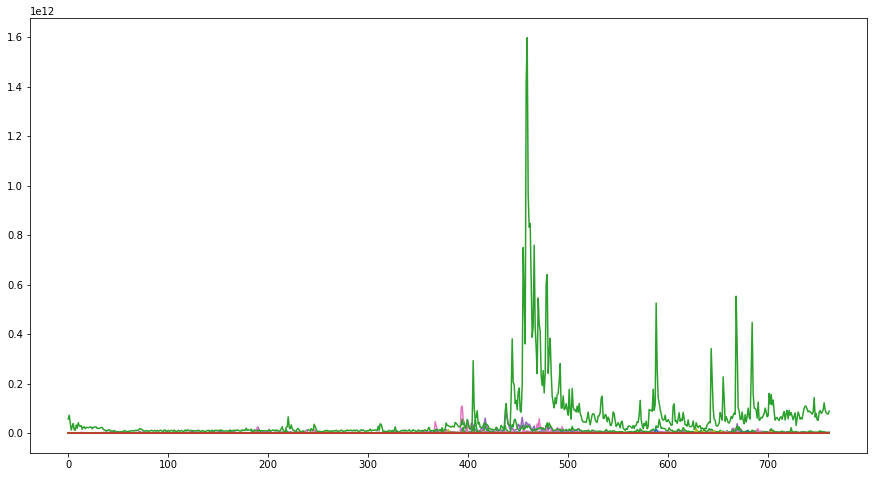

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(df_close)

# 合併所有收盤價

In [39]:


#from st_F import *
import pandas as pd
import numpy as np
import seaborn as sns

#os.chdir('C:\\Users\\User\\all_2022_4_29\\姜林傑佑\\6_6_Python建構策略回測系統\\6_6_Python建構策略回測系統')
import os
os.chdir('D:\\Pair_Trading\\crypto_ohlc')
symbol = pd.read_csv('symbol.csv')['symbol']

currency_plot_list = []
df_volume = []
df_close = []
for ii in range(len(symbol)):
    kk = pd.read_csv(symbol.iloc[ii]+'.csv',encoding='BIG5')['close']
    kk.name = symbol.iloc[ii]
    df_close.append(kk)
df_close = pd.concat(df_close, axis=1)

# 波動度

In [ ]:
def volatility(currency_1, currency_2, threshold):

    ratio = df_close[currency_1]/df_close[currency_2]
    zscore = (ratio-ratio.mean())/ratio.std()
    signal = ((zscore.shift(1)>0) & (zscore<=0)) | ((zscore.shift(1)<=0) & (zscore>0))
    num = len(signal[signal])
    if num>threshold:
        return True
    else:
        return False

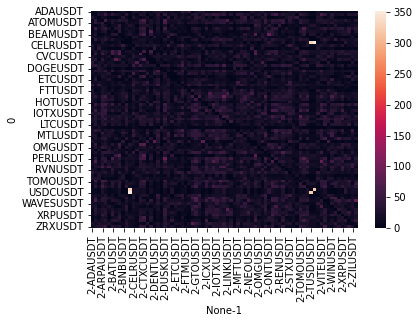

In [110]:
data = []
for i in range(df_close.shape[1]):
    for j in range(df_close.shape[1]):
        currency_1 = df_close.columns[i]
        currency_2 = df_close.columns[j]
        #volatility(currency_1, currency_2, 90)
        ratio = df_close[currency_1]/df_close[currency_2]
        zscore = (ratio-ratio.mean())/ratio.std()
        signal = ((zscore.shift(1)>0) & (zscore<=0)) | ((zscore.shift(1)<=0) & (zscore>0))
        num = len(signal[signal])
        data.append([currency_1, currency_2, num])
data2 = pd.DataFrame(data).sort_values(2)
sns.heatmap(data2.set_index([0,1]).unstack())

In [114]:
threshold = 90
data3 = data2[data2[0]!=data2[1]]
data3[data3[2]>threshold]

0         1    2
4709  BEAMUSDT   ONTUSDT   92
3287   GTOUSDT   KEYUSDT   93
3894  PERLUSDT  DUSKUSDT   96
711   TUSDUSDT  USDCUSDT  323
1395  USDCUSDT  TUSDUSDT  323
4629  BUSDUSDT  TUSDUSDT  333
753   TUSDUSDT  BUSDUSDT  333
1446  USDCUSDT  BUSDUSDT  352
4638  BUSDUSDT  USDCUSDT  352

# 相關性

In [116]:
def correlation(currency_1, currency_2, threshold):
    corr = pd.concat([df_close[currency_1], df_close[currency_2]], axis=1).corr().iloc[1,0]
    if corr>threshold:
        return True
    else:
        return False

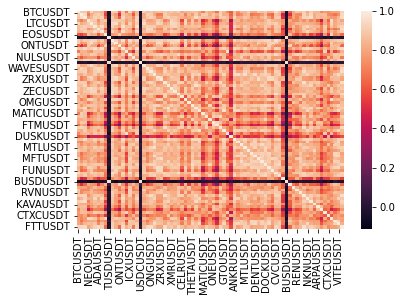

In [117]:
sns.heatmap(df_close.corr())

In [118]:
threshold = 0.8
kk = df_close.corr().stack().sort_values().reset_index()
kk = kk[kk['level_0']!=kk['level_1']]
kk[kk[0]>threshold]

level_0   level_1         0
2848  KAVAUSDT   LTCUSDT  0.800192
2849   LTCUSDT  KAVAUSDT  0.800192
2850   FUNUSDT  TROYUSDT  0.800210
2851  TROYUSDT   FUNUSDT  0.800210
2852   FTTUSDT   ZILUSDT  0.800246
...        ...       ...       ...
5847  HBARUSDT   FETUSDT  0.972039
5848  MITHUSDT   GTOUSDT  0.972193
5849   GTOUSDT  MITHUSDT  0.972193
5850  BUSDUSDT  USDCUSDT  0.975924
5851  USDCUSDT  BUSDUSDT  0.975924

[3004 rows x 3 columns]

# 距離

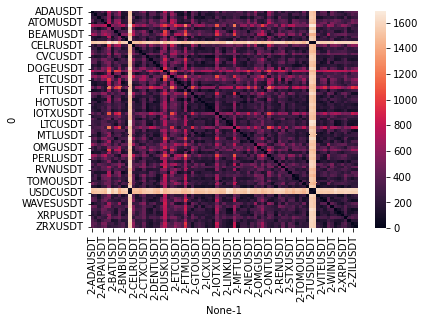

In [131]:
data = []
for i in range(df_close.shape[1]):
    for j in range(df_close.shape[1]):
        currency_1 = df_close.columns[i]
        currency_2 = df_close.columns[j]
        zscore_1 = (df_close[currency_1]-df_close[currency_1].mean())/df_close[currency_1].std()
        zscore_2 = (df_close[currency_2]-df_close[currency_2].mean())/df_close[currency_2].std()
        num = ((zscore_1-zscore_2)**2).sum()
        data.append([currency_1, currency_2, num])
data2 = pd.DataFrame(data).sort_values(2)
sns.heatmap(data2.set_index([0,1]).unstack())

In [135]:
threshold = 90
data3 = data2[data2[0]!=data2[1]]
data3[data3[2]<threshold]

0         1          2
4638  BUSDUSDT  USDCUSDT  36.643741
1446  USDCUSDT  BUSDUSDT  36.643741
3269   GTOUSDT  MITHUSDT  42.321550
2737  MITHUSDT   GTOUSDT  42.321550
1990   FETUSDT  HBARUSDT  42.556690
...        ...       ...        ...
5881   FTTUSDT  IOSTUSDT  88.754895
1354   VETUSDT  ANKRUSDT  88.808908
3482  ANKRUSDT   VETUSDT  88.808908
4335   FUNUSDT   ZILUSDT  89.074940
1827   ZILUSDT   FUNUSDT  89.074940

[162 rows x 3 columns]